In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from data_preprocess import dataFormatter
from skimage import data, exposure

%load_ext autoreload
%autoreload 2

In [11]:
csv  = pd.read_csv('../challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv')
# we filter our data set and only keep images 'happy', 'sad', 'angry'
csv = csv[(csv.emotion ==0) | (csv.emotion==3) | (csv.emotion==4)]

In [3]:
emotions_mapping = dict({0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'})

In [4]:
def get_image(index):
    img = np.array([int(i) for i in csv.pixels.values[index].split()]).reshape((48,48))
    return img

    
def plot_image(index= 10):
    plt.figure(figsize=(8,6))
    img = get_image(index)
    plt.imshow(img, cmap='gray')
    plt.title(emotions_mapping[csv.emotion.values[index]])


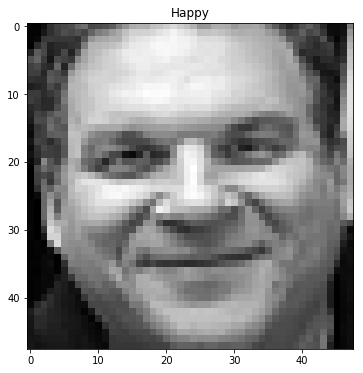

In [5]:
plot_image(7)

### Preprocess

#### HoG features 

In [12]:
import skimage

In [13]:
data_formatter = dataFormatter(csv)

In [ ]:
hog_image = data_formatter.compute_hog()

/anaconda3/lib/python3.7/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/anaconda3/lib/python3.7/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


In [ ]:
index = 10

hog_image_rescaled = exposure.rescale_intensity(hog_image[index], in_range=(0, 10))
img = get_image(index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.set_title(emotions_mapping[csv.emotion.values[index]])
ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)

# Rescale histogram for better display

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
data_formatter.process_target()

In [ ]:
from model import Model

In [ ]:
hyperparameters = dict({'random_state' : None,
                        'epochs':10,
                        'kernel':'linear',
                        'decision_function':'ovr',
                        'gamma':'scale'
                       })
    

model = Model(model_type ='SVM',hyperparameters, predictors = ['hog_features'], targets=[0,3,4])
model.train(data_formatter.data)